In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_excel('Software_Vuln_Data.xlsx', sheet_name ='vuln') # Reading data 

In [3]:
data.describe()

,QID,Severity,Port,Times Detected,Times Reopened,CVSS,CVSS3
count,69909.000000,69909.000000,46458.000000,69909.000000,10965.000000,69909.000000,49820.000000
mean,80771.576092,2.894949,1512.361875,36.457366,1.763338,4.271057,5.998314
std,74274.334047,0.888893,3124.608964,167.254555,2.007894,1.474804,1.219130
min,5001.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,38173.000000,2.000000,123.000000,4.000000,1.000000,3.500000,5.300000
50%,38670.000000,3.000000,443.000000,6.000000,1.000000,3.900000,5.800000
75%,86763.000000,3.000000,443.000000,17.000000,2.000000,4.700000,6.700000
max,373156.000000,5.000000,65000.000000,2809.000000,29.000000,10.000000,10.000000


In [4]:
print(data)

          masked Ip                 Network Tracking Method  \
0      lab_2_IP9036  Global Default Network          QAGENT   
1      lab_2_IP9036  Global Default Network          QAGENT   
2      lab_2_IP9036  Global Default Network          QAGENT   
3      lab_2_IP9036  Global Default Network          QAGENT   
4      lab_2_IP9036  Global Default Network          QAGENT   
...             ...                     ...             ...   
69904     lab_2_IP2  Global Default Network              IP   
69905     lab_2_IP2  Global Default Network              IP   
69906     lab_2_IP2  Global Default Network              IP   
69907     lab_2_IP2  Global Default Network              IP   
69908     lab_2_IP1  Global Default Network              IP   

                                                      OS  \
0                                   Ubuntu Linux 16.04.4   
1                                   Ubuntu Linux 16.04.4   
2                                   Ubuntu Linux 16.04.4   
3  

In [5]:
data.shape


(69909, 39)

# Handling the missing Values 

In [6]:
data.isnull().sum()

masked Ip                 0
Network                   0
Tracking Method           0
OS                     1237
IP Status                 0
QID                       0
Title                     0
Vuln Status               0
Type                      0
Severity                  0
Port                  23451
Protocol              23451
SSL                   40641
First Detected            0
Last Detected             0
Times Detected            0
Date Last Fixed       53268
First Reopened        58944
Last Reopened         58944
Times Reopened        58944
CVE ID                44803
Vendor Reference      50879
Bugtraq ID            53177
CVSS                      0
CVSS Base                 0
CVSS Temporal             0
CVSS Environment          0
CVSS3                 20089
CVSS3 Base            20089
CVSS3 Temporal        20089
Threat                    0
Impact                  500
Solution                  0
Exploitability        60207
Associated Malware    69715
PCI Vuln            

In [7]:
data.tail

<bound method NDFrame.tail of           masked Ip                 Network Tracking Method  \
0      lab_2_IP9036  Global Default Network          QAGENT   
1      lab_2_IP9036  Global Default Network          QAGENT   
2      lab_2_IP9036  Global Default Network          QAGENT   
3      lab_2_IP9036  Global Default Network          QAGENT   
4      lab_2_IP9036  Global Default Network          QAGENT   
...             ...                     ...             ...   
69904     lab_2_IP2  Global Default Network              IP   
69905     lab_2_IP2  Global Default Network              IP   
69906     lab_2_IP2  Global Default Network              IP   
69907     lab_2_IP2  Global Default Network              IP   
69908     lab_2_IP1  Global Default Network              IP   

                                                      OS  \
0                                   Ubuntu Linux 16.04.4   
1                                   Ubuntu Linux 16.04.4   
2                                

In [8]:
##Checking null percentage

In [9]:
null_percentage = data.isnull().sum()/len(data)*100
null_percentage.sort_values(ascending = False)

Associated Malware    99.722496
Exploitability        86.121959
Times Reopened        84.315324
Last Reopened         84.315324
First Reopened        84.315324
Date Last Fixed       76.196198
Bugtraq ID            76.066029
Vendor Reference      72.778898
OS CPE                69.169921
CVE ID                64.087600
SSL                   58.134146
Protocol              33.545037
Port                  33.545037
CVSS3 Temporal        28.735928
CVSS3 Base            28.735928
CVSS3                 28.735928
OS                     1.769443
Impact                 0.715215
CVSS Temporal          0.000000
Threat                 0.000000
Solution               0.000000
PCI Vuln               0.000000
Category               0.000000
CVSS Environment       0.000000
masked Ip              0.000000
CVSS Base              0.000000
CVSS                   0.000000
Network                0.000000
Times Detected         0.000000
Last Detected          0.000000
First Detected         0.000000
Severity

## We remove the features that have more then 35% Null values

In [10]:
NA_col = data.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.35*len(data))]
len(NA_col)

11

In [11]:
# Function to remove null values having more than 35 percent.

def removeNull(df,percent=0.35):
    df = df.copy()
    ishape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped\t: ",len(colnames))    
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

data = removeNull(data)
data

Number of Columns dropped	:  11

Old dataset rows,columns (69909, 39) 
New dataset rows,columns (69909, 28)


,masked Ip,Network,Tracking Method,OS,IP Status,QID,Title,Vuln Status,Type,Severity,...,CVSS Environment,CVSS3,CVSS3 Base,CVSS3 Temporal,Threat,Impact,Solution,PCI Vuln,Category,Non-running Kernel
0,lab_2_IP9036,Global Default Network,QAGENT,Ubuntu Linux 16.04.4,"host scanned, found vuln",197967,Ubuntu Security Notification for Grub2 Vulnera...,Active,Vuln,4,...,lab_2,7.1,8.2 (AV:L/AC:L/PR:H/UI:N/S:C/C:H/I:H/A:H),7.1 (E:U/RL:O/RC:C),The GRUB2 boot loader is vulnerable to buffer ...,Successful exploitation allows attacker to exe...,Refer to Ubuntu advisory USN-4432-1 (https://u...,yes,Ubuntu,No
1,lab_2_IP9036,Global Default Network,QAGENT,Ubuntu Linux 16.04.4,"host scanned, found vuln",197742,"Ubuntu Security Notification for Linux, Linux-...",Active,Vuln,4,...,lab_2,7.8,9.8 (AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H),7.8 (E:U/RL:O/RC:U),It was discovered that a heap-based buffer o...,A physically proximate attacker could use t...,Refer to Ubuntu advisory USN-4228-1 (https://l...,yes,Ubuntu,Yes
2,lab_2_IP9036,Global Default Network,QAGENT,Ubuntu Linux 16.04.4,"host scanned, found vuln",197688,Ubuntu Security Notification for LibTIFF vulne...,Active,Vuln,4,...,lab_2,7.7,8.8 (AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H),7.7 (E:U/RL:O/RC:C),It was discovered that LibTIFF incorrectly ha...,If a user or automated system were tricked i...,Refer to Ubuntu advisory USN-4158-1 (https://l...,yes,Ubuntu,No
3,lab_2_IP9036,Global Default Network,QAGENT,Ubuntu Linux 16.04.4,"host scanned, found vuln",196604,Ubuntu Security Notification for Linux Vulnera...,Active,Vuln,4,...,lab_2,6.5,7.8 (AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H),6.5 (E:P/RL:O/RC:U),It was discovered that a race condition exis...,A local attacker could use this to gain adm...,Refer to Ubuntu advisory USN-3106-1 (https://l...,yes,Ubuntu,Yes
4,lab_2_IP9036,Global Default Network,QAGENT,Ubuntu Linux 16.04.4,"host scanned, found vuln",372015,Docker Build Remote Code Execution Vulnerability,Active,Vuln,3,...,lab_2,7.6,8.4 (AV:L/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H),7.6 (E:P/RL:O/RC:C),Docker Engine enables containerized applicatio...,Successful exploitation of this vulnerability ...,Customers are advised to upgrade docker engine...,yes,Local,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69904,lab_2_IP2,Global Default Network,IP,VMware ESXi 6.5.0 build 8294253,"host scanned, found vuln",38628,SSL/TLS Server supports TLSv1.0,Active,Vuln,3,...,lab_2,6.2,6.5 (AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:L/A:N),6.2 (E:F/RL:W/RC:C),TLS is capable of using a multitude of ciphers...,An attacker can exploit cryptographic flaws to...,Disable the use of TLSv1.0 protocol in favor o...,yes,General remote services,No
69905,lab_2_IP2,Global Default Network,IP,VMware ESXi 6.5.0 build 8294253,"host scanned, found vuln",38628,SSL/TLS Server supports TLSv1.0,Active,Vuln,3,...,lab_2,6.2,6.5 (AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:L/A:N),6.2 (E:F/RL:W/RC:C),TLS is capable of using a multitude of ciphers...,An attacker can exploit cryptographic flaws to...,Disable the use of TLSv1.0 protocol in favor o...,yes,General remote services,No
69906,lab_2_IP2,Global Default Network,IP,VMware ESXi 6.5.0 build 8294253,"host scanned, found vuln",38169,SSL Certificate - Self-Signed Certificate,Active,Vuln,3,...,lab_2,5.3,6.5 (AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:L/A:N),5.3 (E:U/RL:W/RC:U),An SSL Certificate associates an entity (perso...,"By exploiting this vulnerability, an attacker ...",Please install a server certificate signed by ...,yes,General remote services,No
69907,lab_2_IP2,Global Default Network,IP,VMware ESXi 6.5.0 build 8294253,"host scanned, found vuln",38169,SSL Certificate - Self-Signed Certificate,Active,Vuln,3,...,lab_2,5.3,6.5 (AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:L/A:N),5.3 (E:U/RL:W/RC:U),An SSL Certificate associates an entity (perso...,"By exploiting this vulnerability, an attacker ...",Please install a server certificate signed by ...,yes,General remote services,No


In [12]:
data.isnull().sum()

masked Ip                 0
Network                   0
Tracking Method           0
OS                     1237
IP Status                 0
QID                       0
Title                     0
Vuln Status               0
Type                      0
Severity                  0
Port                  23451
Protocol              23451
First Detected            0
Last Detected             0
Times Detected            0
CVSS                      0
CVSS Base                 0
CVSS Temporal             0
CVSS Environment          0
CVSS3                 20089
CVSS3 Base            20089
CVSS3 Temporal        20089
Threat                    0
Impact                  500
Solution                  0
PCI Vuln                  0
Category                  0
Non-running Kernel        0
dtype: int64

### We still have null values in CVSS3 score

In [13]:
data['Port'].nunique()

258

In [14]:
data['OS'].nunique() # We have lot of unique values for 'OS'.

269

In [15]:
data['OS'].fillna('Unknown', inplace=True)
data['OS'].isnull().sum()
# we have filled the 'OS' null values with 'Unknow' 

0

In [16]:
data['Vuln Status'].describe()

count      69909
unique         4
top       Active
freq       56989
Name: Vuln Status, dtype: object

In [17]:
mean_cvss3=data['CVSS3'].mean()
mean_cvss3

5.998313930148398

## Filling the missing values of CVSS3 by mean

In [18]:
data['CVSS3'].fillna(mean_cvss3,inplace=True)

In [19]:
data['CVSS3'].describe()

count    69909.000000
mean         5.998314
std          1.029163
min          0.000000
25%          5.400000
50%          5.998314
75%          6.400000
max         10.000000
Name: CVSS3, dtype: float64

In [20]:
data['CVSS'].describe()

count    69909.000000
mean         4.271057
std          1.474804
min          0.000000
25%          3.500000
50%          3.900000
75%          4.700000
max         10.000000
Name: CVSS, dtype: float64

### We can see difference between CVSS and CVSS3 scores. From the 'describe' function it is clear that CVSS3  generates slighty higher score then CVSS


# I am dropping Few Coloums as they are useless and may create confusion.

In [21]:
data.shape # Before dropping the coloums have look at the shape 

(69909, 28)

In [22]:
#data=data.drop('QID', axis=1)
#data=data.drop('First Detected', axis=1)
#data=data.drop('Last Detected', axis=1)
#data=data.drop('Port', axis=1)
#data=data.drop('Protocol', axis=1)

In [23]:
data.shape #After dropping have a look at the shape.

(69909, 28)

<AxesSubplot:>

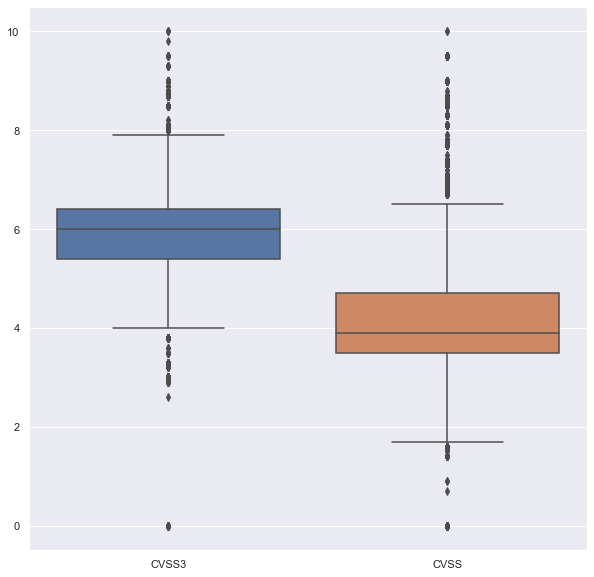

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data=data.loc[:, ['CVSS3', 'CVSS']])


{'whiskers': [<matplotlib.lines.Line2D at 0x22719e056a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22719e05c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22719e053d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22719e28220>],
 'fliers': [<matplotlib.lines.Line2D at 0x22719e284f0>],
 'means': []}

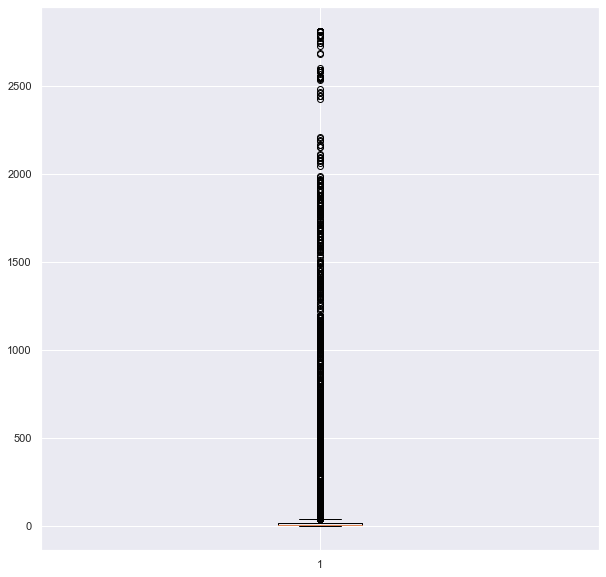

In [25]:
plt.boxplot(data['Times Detected'])

In [26]:
data['Times Detected'].describe()

count    69909.000000
mean        36.457366
std        167.254555
min          1.000000
25%          4.000000
50%          6.000000
75%         17.000000
max       2809.000000
Name: Times Detected, dtype: float64

<AxesSubplot:ylabel='Severity'>

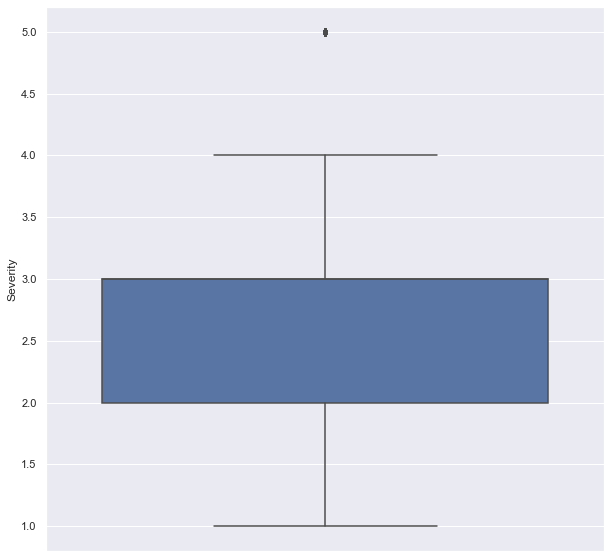

In [27]:
sns.boxplot(y = 'Severity', data = data)

Text(0, 0.5, 'Category')

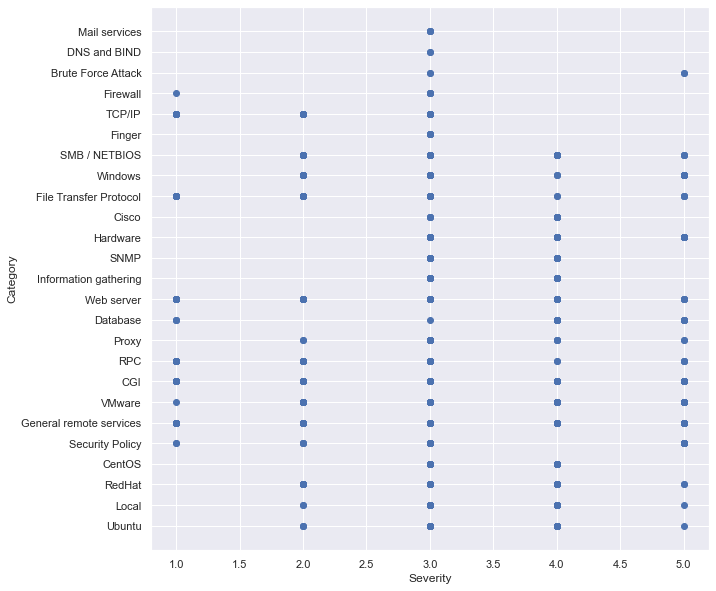

In [28]:
plt.scatter(x=data['Severity'],y=data['Category'])
plt.xlabel('Severity')
plt.ylabel('Category')

<AxesSubplot:xlabel='Vuln Status', ylabel='Count'>

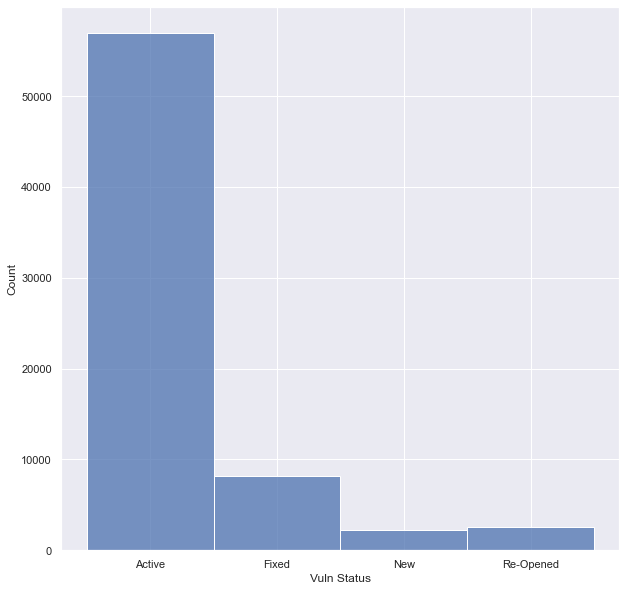

In [29]:
sns.histplot(data = data, x = "Vuln Status")

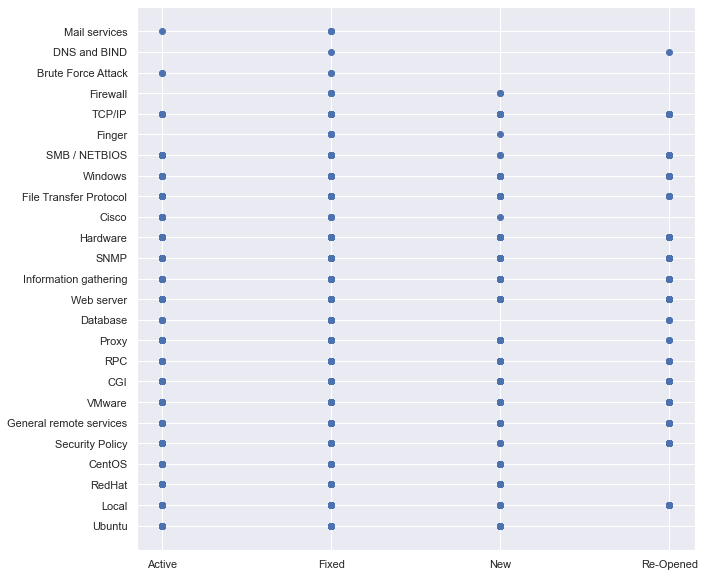

In [30]:
plt.scatter(x=data['Vuln Status'] ,y=data['Category'])

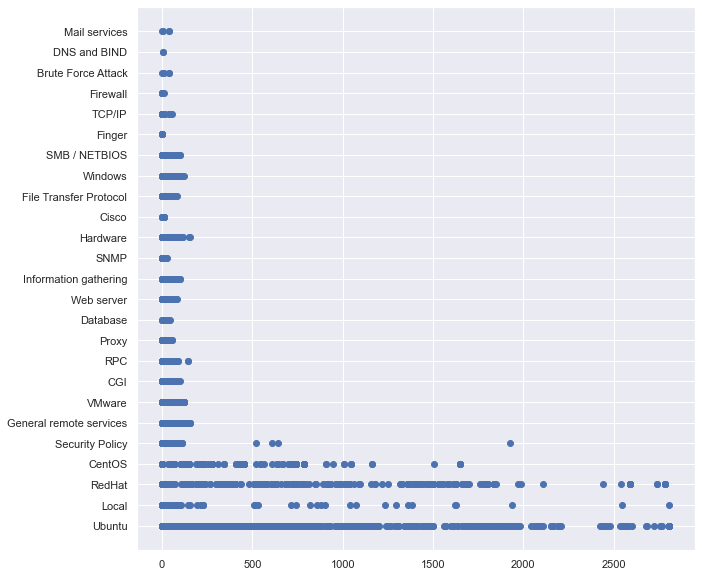

In [31]:
plt.scatter(x=data['Times Detected'],y=data['Category'])


#  From the above observation we notice that Ubuntu,Local,RedHat are the most detected 



Text(0.5, 1.0, 'Severity vs CVSS scores')

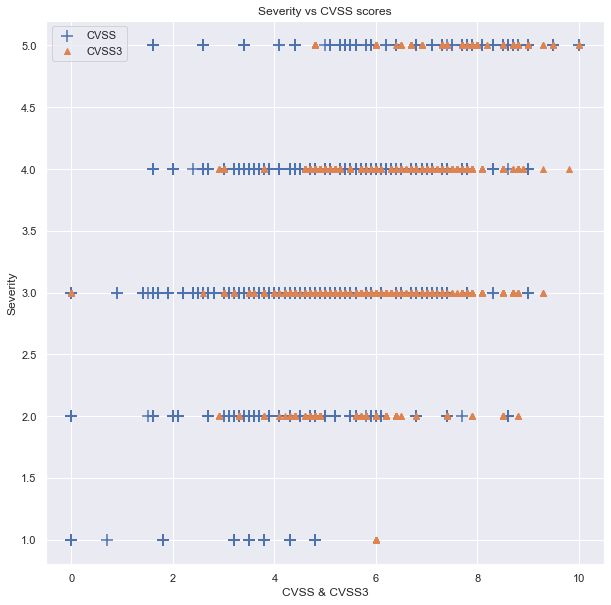

In [32]:
plt.scatter(x=data['CVSS'],y=data['Severity'],marker ="+",s=140,label='CVSS')
plt.scatter(x=data['CVSS3'],y=data['Severity'], marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS & CVSS3')
plt.ylabel('Severity')
plt.title("Severity vs CVSS scores")

Text(0, 0.5, 'Category')

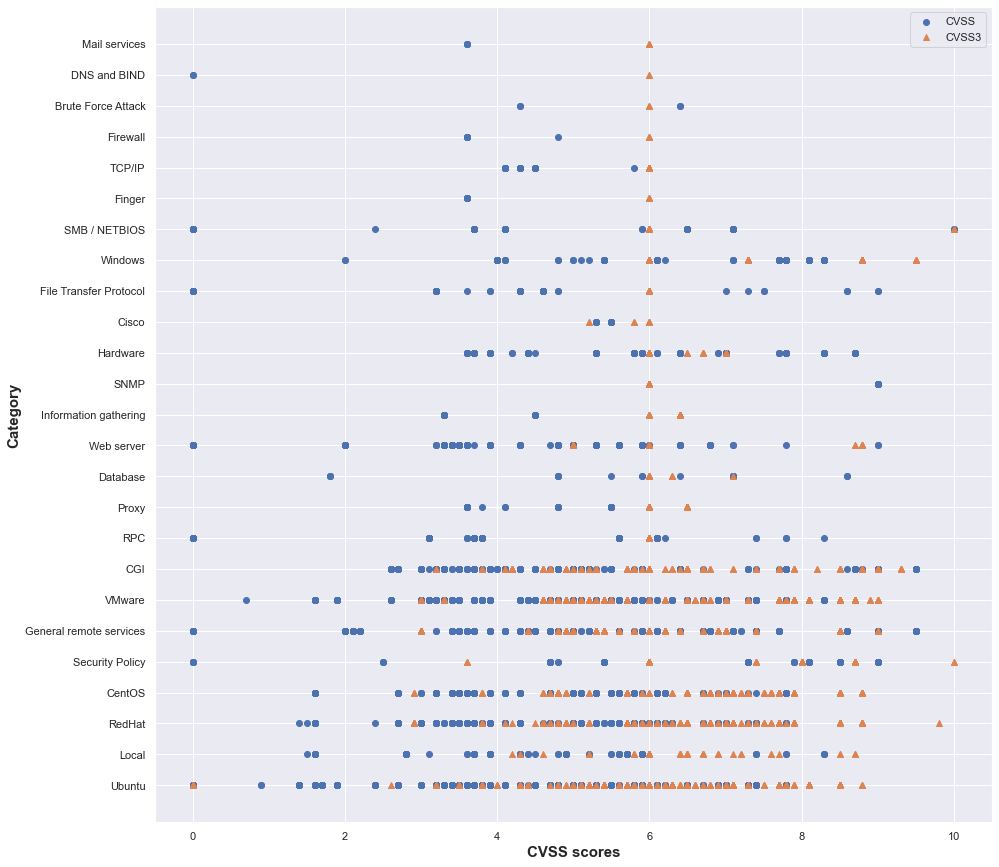

In [65]:
#CVSS scores vs Category 
sns.set_theme(style='darkgrid')
sns.set(rc={"figure.figsize":(15, 15)})
plt.scatter(x=data['CVSS'],y=data['Category'],label='CVSS')
plt.scatter(x=data['CVSS3'],y=data['Category'] ,marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS scores',fontweight ='bold', fontsize = 15)
plt.ylabel('Category',fontweight ='bold', fontsize = 15)

In [34]:
data['Category'].describe()
## we notice that General remote services are most frequent OS categories. 

count                       69909
unique                         25
top       General remote services
freq                        40391
Name: Category, dtype: object

In [35]:
# Need to find which OS in Ubuntu category and other OS in other categories are havnig more CVSS and and mosty detecte.
# The next task is to drop few features as its simply creating confusion.
# Take the import features and do analysis.


In [36]:
#search="Ubuntu"
#data_ubuntu = data["OS"].str.startswith(search ,na=False)
#data[data_ubuntu]

# Analysis of Ubuntu 

In [37]:
# condition mask
mask = data['Category'] == 'Ubuntu'
 
# new dataframe with selected rows
data_ubuntu = pd.DataFrame(data[mask])
 
print(data_ubuntu)
data_ubuntu.describe()

         masked Ip                 Network Tracking Method  \
0     lab_2_IP9036  Global Default Network          QAGENT   
1     lab_2_IP9036  Global Default Network          QAGENT   
2     lab_2_IP9036  Global Default Network          QAGENT   
3     lab_2_IP9036  Global Default Network          QAGENT   
6     lab_2_IP9036  Global Default Network          QAGENT   
...            ...                     ...             ...   
2146  lab_2_IP9007  Global Default Network          QAGENT   
2147  lab_2_IP9007  Global Default Network          QAGENT   
2148  lab_2_IP9007  Global Default Network          QAGENT   
2149  lab_2_IP9007  Global Default Network          QAGENT   
2157  lab_2_IP9007  Global Default Network          QAGENT   

                        OS                 IP Status     QID  \
0     Ubuntu Linux 16.04.4  host scanned, found vuln  197967   
1     Ubuntu Linux 16.04.4  host scanned, found vuln  197742   
2     Ubuntu Linux 16.04.4  host scanned, found vuln  197688   

,QID,Severity,Port,Times Detected,CVSS,CVSS3
count,1182.000000,1182.000000,0.0,1182.000000,1182.000000,1182.000000
mean,197686.505076,3.026227,NaN,757.445008,4.469712,6.226819
std,247.118746,0.179818,NaN,714.645240,1.423790,1.436361
min,196604.000000,2.000000,NaN,1.000000,0.000000,0.000000
25%,197515.500000,3.000000,NaN,199.000000,3.400000,5.400000
50%,197742.000000,3.000000,NaN,474.000000,4.700000,6.300000
75%,197886.000000,3.000000,NaN,1149.250000,5.500000,7.300000
max,198032.000000,5.000000,NaN,2809.000000,7.800000,8.800000


In [38]:
data_ubuntu['OS'].nunique() # we only have 5 Unique Opereting system in Ubuntu category.

5

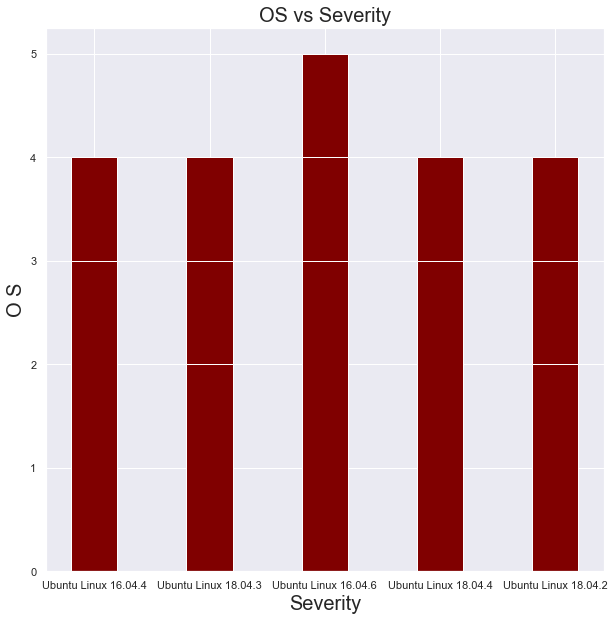

In [68]:
plt.bar(data_ubuntu['OS'], data_ubuntu['Severity'], color ='maroon',width = 0.4)
plt.xlabel("Severity",fontsize = 20)
plt.ylabel("O S",fontsize = 20)
plt.title("OS vs Severity",fontsize = 20)
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(10, 10)})

## It is Noticed that Ubuntu Linux 16.04.6 is more severe then other Ubuntu OS.




Text(0.5, 0, 'O S')

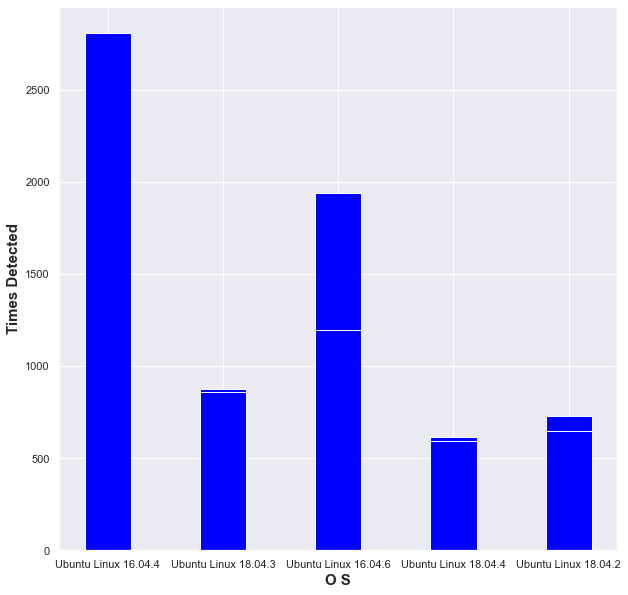

In [69]:
plt.bar(data_ubuntu['OS'], data_ubuntu['Times Detected'], color ='blue',width = 0.4)

plt.ylabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.xlabel('O S',fontweight ='bold', fontsize = 15)


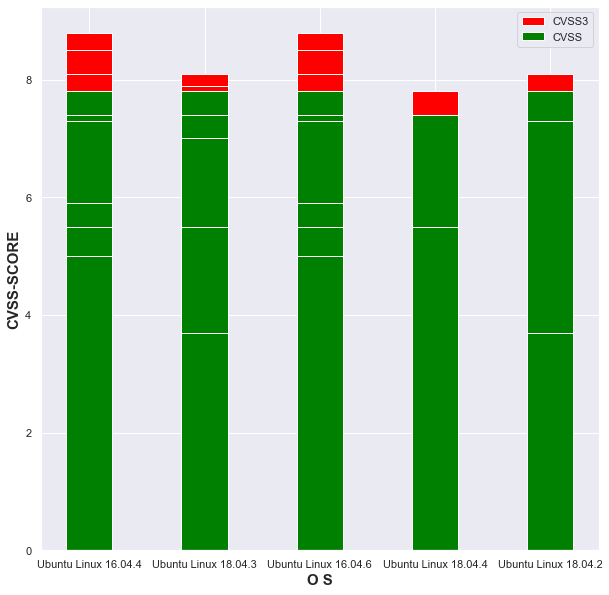

In [70]:
plt.bar(data_ubuntu['OS'], data_ubuntu['CVSS3'], color ='red',width = 0.4, label ='CVSS3')
plt.bar(data_ubuntu['OS'], data_ubuntu['CVSS'], color ='green',width = 0.4, label ='CVSS')

plt.xlabel('O S',fontweight ='bold', fontsize = 15)
plt.ylabel('CVSS-SCORE',fontweight ='bold', fontsize = 15)

plt.legend()

## It is observed that Ubuntu Linux 16.04.4 and 16.04.6  is having High CVSS score and also detected the most 


# Analysis of Local Category OS

In [42]:
# condition mask
mask = data['Category'] == 'Local'
 
# new dataframe with selected rows
data_local = pd.DataFrame(data[mask])
 
print(data_local)
data_local.describe()

          masked Ip                 Network Tracking Method  \
4      lab_2_IP9036  Global Default Network          QAGENT   
5      lab_2_IP9036  Global Default Network          QAGENT   
293    lab_2_IP9034  Global Default Network          QAGENT   
294    lab_2_IP9034  Global Default Network          QAGENT   
295    lab_2_IP9034  Global Default Network          QAGENT   
...             ...                     ...             ...   
69465    lab_2_IP66  Global Default Network              IP   
69487    lab_2_IP65  Global Default Network              IP   
69488    lab_2_IP65  Global Default Network              IP   
69489    lab_2_IP65  Global Default Network              IP   
69522    lab_2_IP63  Global Default Network              IP   

                                                      OS  \
4                                   Ubuntu Linux 16.04.4   
5                                   Ubuntu Linux 16.04.4   
293                                CentOS Linux 7.7.1908   
294

,QID,Severity,Port,Times Detected,CVSS,CVSS3
count,367.000000,367.000000,9.0,367.000000,367.000000,367.000000
mean,148064.583106,3.043597,20545.0,88.869210,4.062670,6.094752
std,77352.581089,0.241254,11208.0,310.373729,0.836625,0.427203
min,115292.000000,2.000000,5601.0,1.000000,1.500000,4.200000
25%,121695.000000,3.000000,5601.0,8.000000,3.900000,5.998314
50%,121695.000000,3.000000,28017.0,16.000000,3.900000,5.998314
75%,121695.000000,3.000000,28017.0,27.000000,3.900000,5.998314
max,373156.000000,5.000000,28017.0,2806.000000,8.300000,8.700000


In [43]:
# It is noticed that there are 47 unique OS belonging to Local Category.
data_local['OS'].describe()

count                                                   367
unique                                                   47
top       Ubuntu / Tiny Core Linux / Linux 2.6.x / IBM A...
freq                                                     79
Name: OS, dtype: object

In [44]:
# So we set thrushold value here that all the OS having CVSS over 7(High) and analysis them.

In [45]:
data_local_cvss_7 = data_local.loc[(data_local['CVSS'] > 7)]
print(data_local_cvss_7)
data_local_cvss_7.describe()

          masked Ip                 Network Tracking Method  \
451    lab_2_IP9028  Global Default Network          QAGENT   
5067   lab_2_IP8675  Global Default Network              IP   
6712   lab_2_IP8481  Global Default Network              IP   
6714   lab_2_IP8481  Global Default Network              IP   
6839   lab_2_IP8473  Global Default Network              IP   
6841   lab_2_IP8473  Global Default Network              IP   
11082  lab_2_IP7910  Global Default Network              IP   
22085  lab_2_IP6507  Global Default Network              IP   

                                                      OS  \
451                                CentOS Linux 7.8.2003   
5067                                              Ubuntu   
6712                       VMware ESX 4.1.0 build 260247   
6714                       VMware ESX 4.1.0 build 260247   
6839                       VMware ESX 4.1.0 build 260247   
6841                       VMware ESX 4.1.0 build 260247   
11082      U

,QID,Severity,Port,Times Detected,CVSS,CVSS3
count,8.000000,8.000000,3.0,8.000000,8.000000,8.000000
mean,214103.875000,3.625000,5601.0,19.375000,7.837500,7.311868
std,130498.074693,0.744024,0.0,10.676242,0.417261,1.252542
min,118569.000000,3.000000,5601.0,2.000000,7.400000,5.998314
25%,118867.500000,3.000000,5601.0,13.750000,7.400000,5.998314
50%,120832.500000,3.500000,5601.0,25.000000,7.800000,7.200000
75%,371687.000000,4.000000,5601.0,27.000000,8.300000,8.700000
max,371687.000000,5.000000,5601.0,28.000000,8.300000,8.700000


Text(0, 0.5, 'O S')

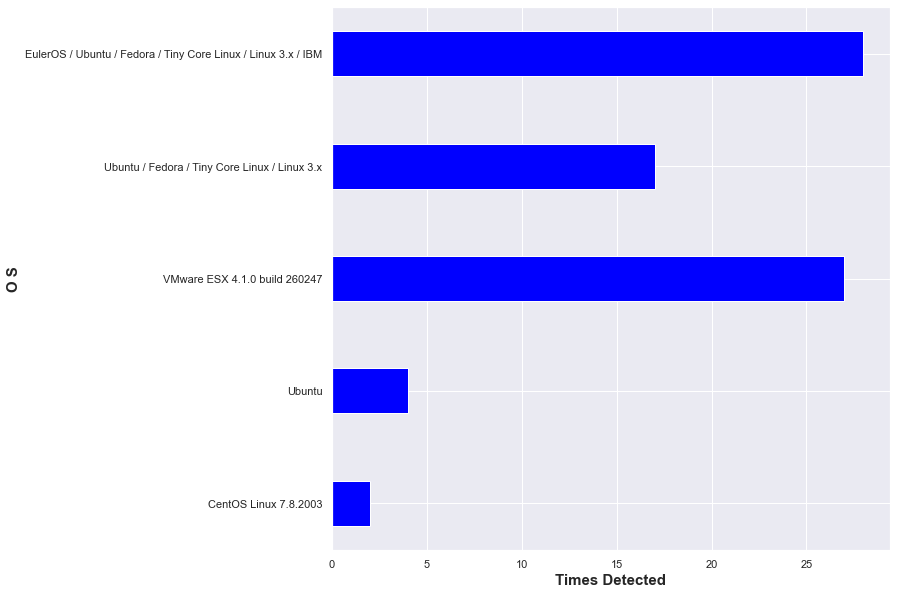

In [46]:
OS=data_local_cvss_7['OS']
Times_Detected=data_local_cvss_7['Times Detected']
plt.barh(OS, Times_Detected, color ='blue',height=0.4)
plt.xlabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)

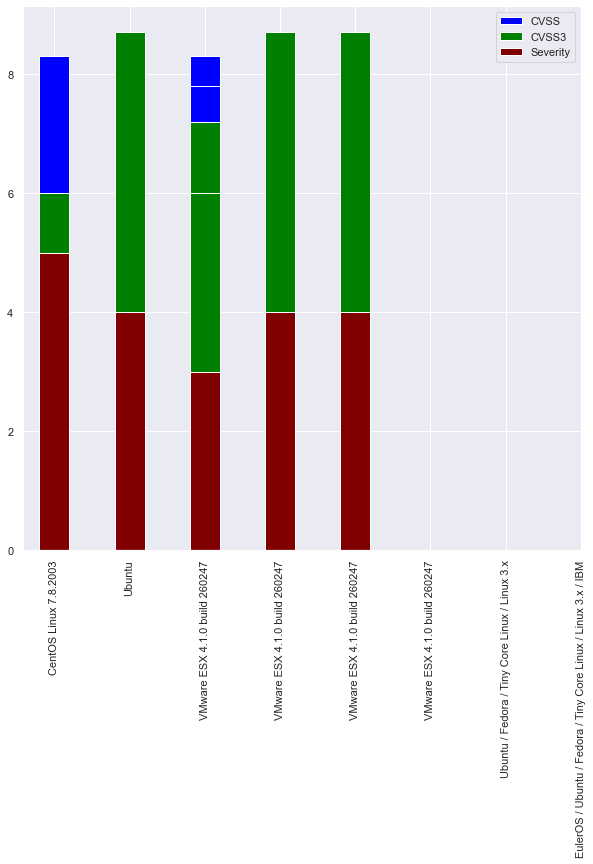

In [71]:

plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['CVSS'], color ='blue',width = 0.4,label='CVSS')
p1=plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['CVSS3'], color ='green',width = 0.4,label='CVSS3')
plt.bar(data_local_cvss_7['OS'], data_local_cvss_7['Severity'], color ='maroon',width = 0.4,label='Severity')
plt.legend()
y_pos = range(len(data_local_cvss_7['OS']))
plt.xticks(y_pos, data_local_cvss_7['OS'], rotation=90)

OS=data_local_cvss_7['OS']
CVSS=data_local_cvss_7['CVSS']
CVSS3=data_local_cvss_7['CVSS3']

#for i in range(len(OS)):
#    plt.text(i,9,CVSS3[i],ha="center",va="bottom")

#ax.bar_label(p1, label_type='center')

# Observations:
## 1)All the OS lie in the High CVSS score region but none of them lie in the Critical region
## 2)VMware ESX 4.1.0 build 260247 has been listed the as most number of vulnerability                   detected and CVSS lieing in the High vulnerability region

# Analysis of RedHat Category OS

In [48]:
# condition mask
mask = data['Category'] == 'RedHat'
 
# new dataframe with selected rows
data_redhat = pd.DataFrame(data[mask])
 
print(data_redhat)
data_redhat.describe()

         masked Ip                 Network Tracking Method  \
206   lab_2_IP9035  Global Default Network          QAGENT   
207   lab_2_IP9035  Global Default Network          QAGENT   
208   lab_2_IP9035  Global Default Network          QAGENT   
209   lab_2_IP9035  Global Default Network          QAGENT   
210   lab_2_IP9035  Global Default Network          QAGENT   
...            ...                     ...             ...   
2264  lab_2_IP9006  Global Default Network          QAGENT   
2265  lab_2_IP9006  Global Default Network          QAGENT   
2266  lab_2_IP9006  Global Default Network          QAGENT   
2267  lab_2_IP9006  Global Default Network          QAGENT   
2268  lab_2_IP9006  Global Default Network          QAGENT   

                                       OS                 IP Status     QID  \
206          Red Hat Enterprise Linux 8.1  host scanned, found vuln  238147   
207          Red Hat Enterprise Linux 8.1  host scanned, found vuln  238053   
208          Red H

,QID,Severity,Port,Times Detected,CVSS,CVSS3
count,654.000000,654.000000,0.0,654.000000,654.000000,654.000000
mean,237823.062691,3.412844,NaN,651.974006,4.562080,6.789584
std,461.506721,0.702797,NaN,677.371764,1.266919,1.334481
min,236763.000000,2.000000,NaN,1.000000,1.400000,2.900000
25%,237428.000000,3.000000,NaN,61.000000,3.600000,5.998314
50%,237861.000000,4.000000,NaN,406.000000,5.000000,6.800000
75%,238232.000000,4.000000,NaN,1320.250000,5.500000,7.700000
max,238591.000000,5.000000,NaN,2786.000000,7.800000,9.800000


In [49]:
data_redhat['OS'].describe() # We have 6 unique OS in RedHat Category 

count                              654
unique                               6
top       Red Hat Enterprise Linux 8.2
freq                               240
Name: OS, dtype: object

Text(0, 0.5, 'O S')

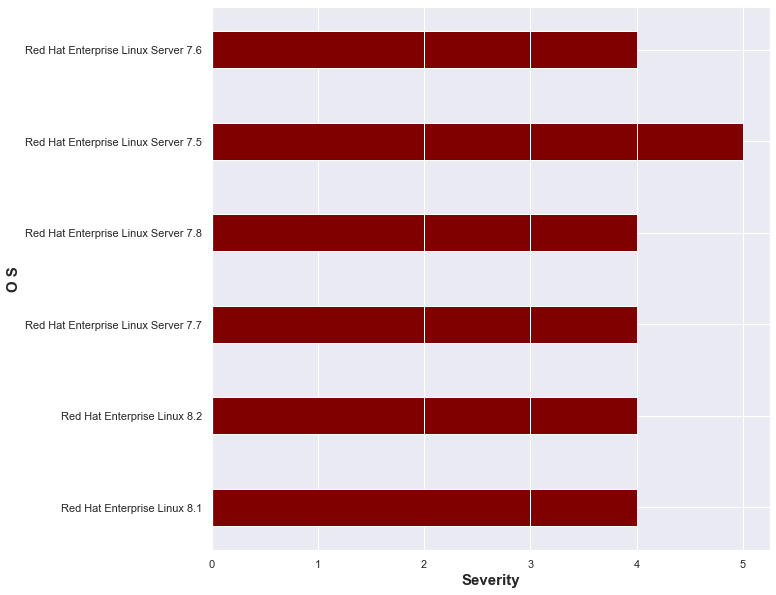

In [50]:
OS=data_redhat['OS']
Severity=data_redhat['Severity']
plt.barh(OS, Severity, color ='maroon',height=0.4)
plt.xlabel("Severity",fontweight ='bold', fontsize = 15)
plt.ylabel("O S",fontweight ='bold', fontsize = 15)


Text(0, 0.5, 'Category')

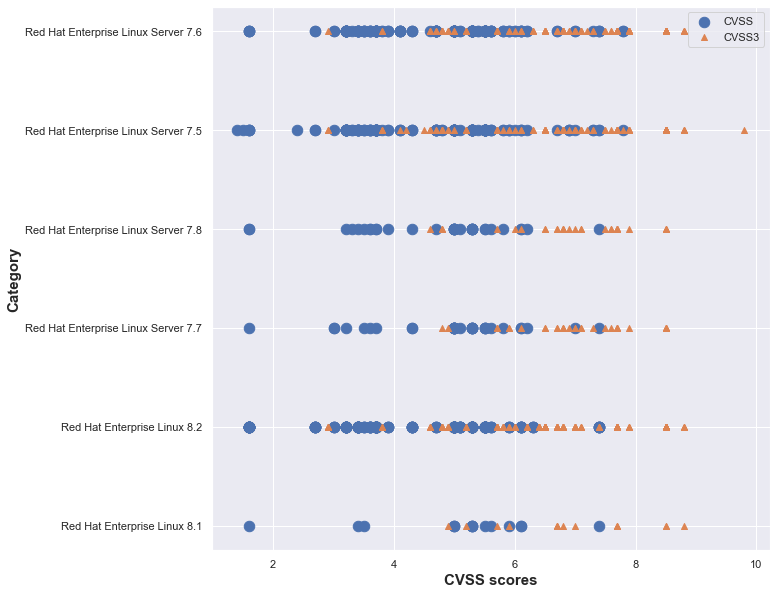

In [51]:
plt.scatter(x=data_redhat['CVSS'],y=data_redhat['OS'], s=110,label='CVSS')
plt.scatter(x=data_redhat['CVSS3'],y=data_redhat['OS'] ,marker ="^",label='CVSS3')
plt.legend()
plt.xlabel('CVSS scores',fontweight ='bold', fontsize = 15)
plt.ylabel('Category',fontweight ='bold', fontsize = 15)

Text(0, 0.5, 'O S')

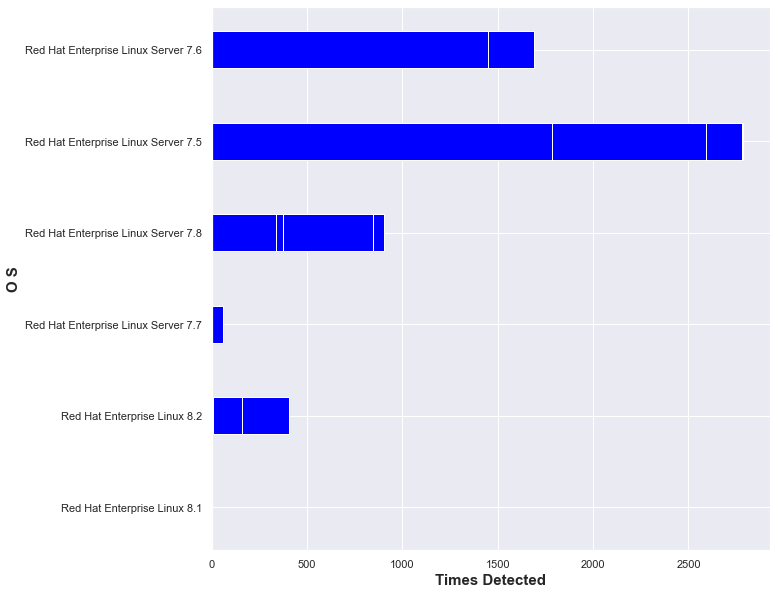

In [52]:
OS=data_redhat['OS']
Times_Detected=data_redhat['Times Detected']
plt.barh(OS, Times_Detected, color ='blue',height=0.4)
plt.xlabel('Times Detected',fontweight ='bold', fontsize = 15)
plt.ylabel('O S',fontweight ='bold', fontsize = 15)

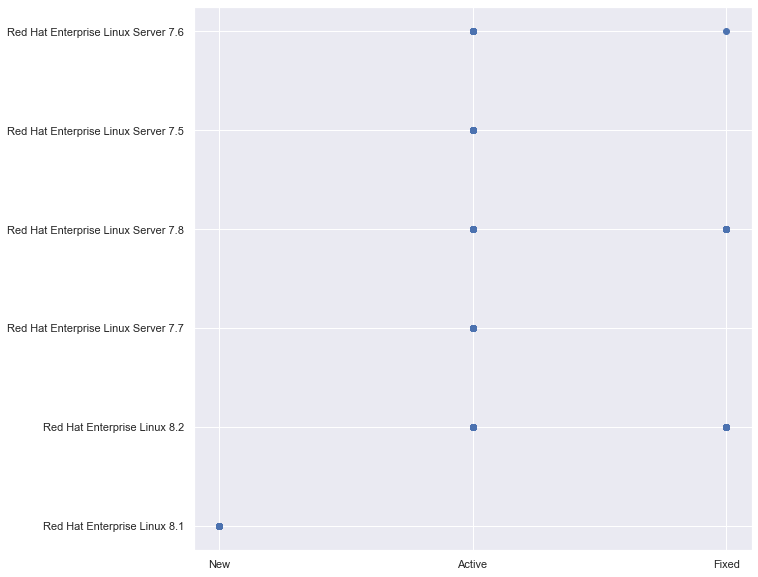

In [53]:
plt.scatter(x=data_redhat['Vuln Status'] ,y=data_redhat['OS'])

# Observation:-
## 1) Red Hat Enterprise Linux Server 7.5 is satisfying all the criteria to be considered Highly vulnerable and can be considered the most critical staged OS in RedHat category

## 2) Red Hat Enterprise Linux Server 7.5 is the most detected and high is CVSS score in the High to critical range. Its vulnerability status is still active and has not been fixed


# CVSS > 9 (critical)

## Now we finally consider the OS and Categories with CVSS score above 9 (Critical) 

In [54]:
data_cvss = data.loc[(data['CVSS'] >= 9) & (data['CVSS3'] >= 9)]
print(data_cvss)
data_cvss.describe()

          masked Ip                 Network Tracking Method  \
12229  lab_2_IP7752  Global Default Network              IP   
15293  lab_2_IP7380  Global Default Network              IP   
16501  lab_2_IP7264  Global Default Network              IP   
27465  lab_2_IP5807  Global Default Network              IP   
38405  lab_2_IP4424  Global Default Network              IP   
45042  lab_2_IP3533  Global Default Network              IP   
45043  lab_2_IP3533  Global Default Network              IP   
45057  lab_2_IP3532  Global Default Network              IP   
45058  lab_2_IP3532  Global Default Network              IP   
47937  lab_2_IP2992  Global Default Network              IP   
53921  lab_2_IP2178  Global Default Network              IP   
69350    lab_2_IP87  Global Default Network              IP   

                                                      OS  \
12229  EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...   
15293  EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...   


,QID,Severity,Port,Times Detected,CVSS,CVSS3
count,12.000000,12.000000,9.000000,12.000000,12.000000,12.000000
mean,24860.583333,4.250000,5371.666667,27.666667,9.166667,9.391667
std,22719.100724,0.965307,4862.124973,31.904213,0.389249,0.296827
min,11950.000000,3.000000,80.000000,1.000000,9.000000,9.000000
25%,11950.000000,3.000000,443.000000,1.000000,9.000000,9.300000
50%,13687.000000,5.000000,9100.000000,9.500000,9.000000,9.300000
75%,20776.500000,5.000000,9100.000000,67.000000,9.000000,9.300000
max,70077.000000,5.000000,10000.000000,71.000000,10.000000,10.000000


In [55]:
data_cvss['OS'].describe() # we can see we have 6 OS with critical CVSS score 


count                                                    12
unique                                                    6
top       EulerOS / Ubuntu / Fedora / Tiny Core Linux / ...
freq                                                      4
Name: OS, dtype: object

In [56]:
# Lets start plotting 
# 1. plotting of OS vs cvss 
# 2. plotting of times detected vs OS
# 3. plotting of pair plot

In [57]:

# plotting of OS vs CVSS


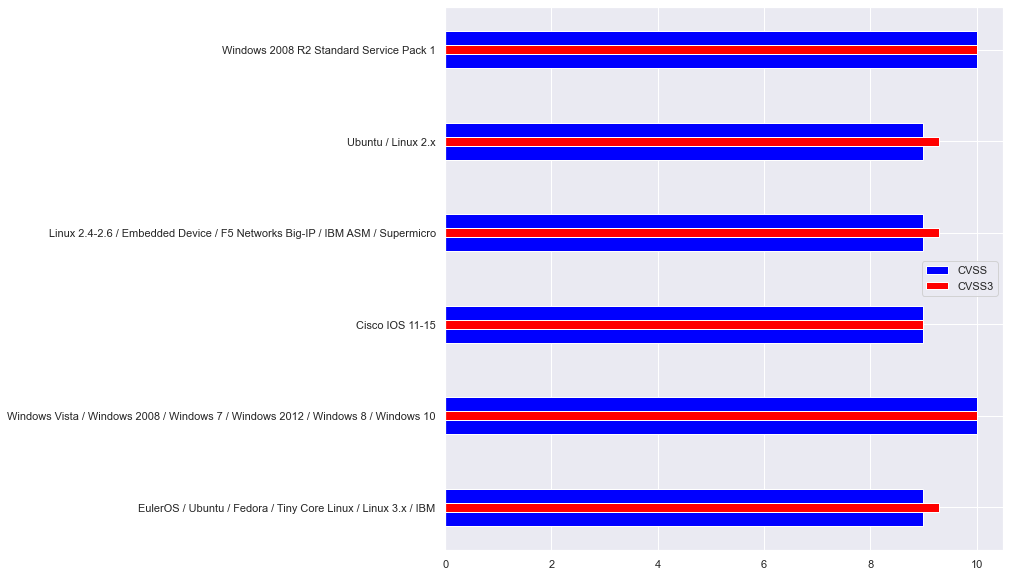

In [58]:
OS=data_cvss['OS']
CVSS=data_cvss['CVSS']
CVSS3=data_cvss['CVSS3']
plt.barh(OS, CVSS, color ='blue',height=0.4,label='CVSS')
plt.barh(OS, CVSS3, color ='red',height=0.1,label='CVSS3')
plt.legend()
#plt.xticks(rotation=90)


In [59]:
# plotting of Time Dectected vs OS

<BarContainer object of 12 artists>

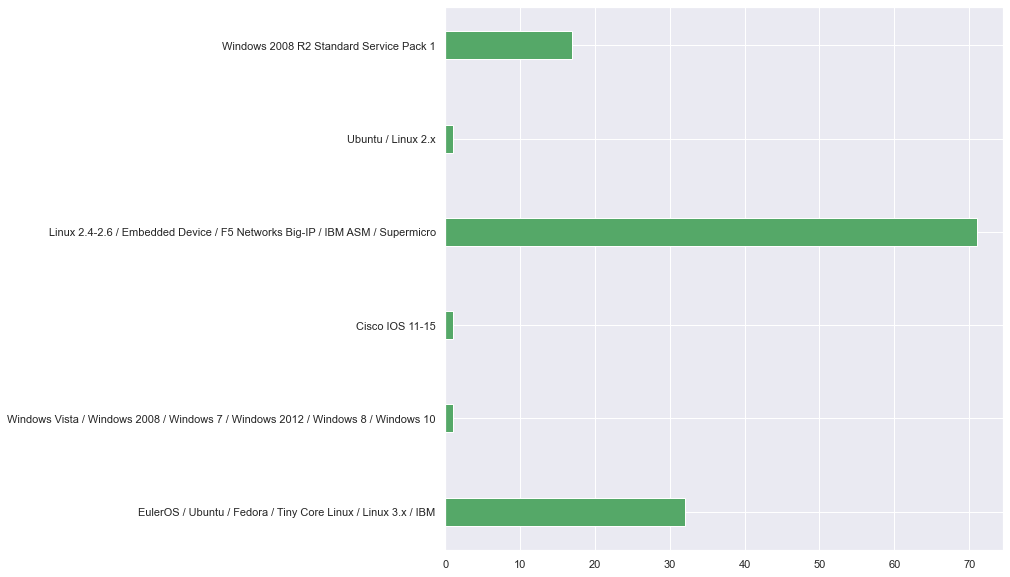

In [60]:
Times=data_cvss['Times Detected']
plt.barh(OS, Times, color ='g',height=0.3,label='CVSS')

<AxesSubplot:xlabel='Vuln Status', ylabel='Count'>

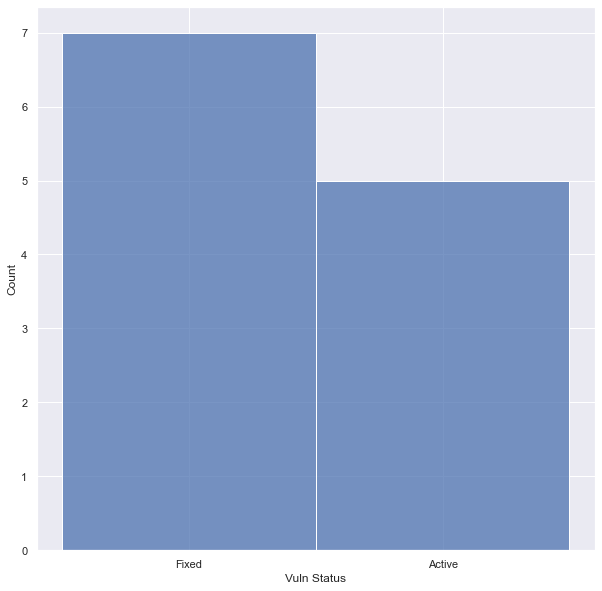

In [61]:
sns.histplot(data = data_cvss, x = "Vuln Status")